# IS453-Financial Analytics Lab 2

An investor believes that one of the three hedge funds he has invested in may be a fraudulent Ponzi scheme. All three funds say that they invest in some combination of stocks and bonds. IS453 lab teams are hired as consultants and asked to analyse the data for the funds to see if there are things that look unusual that the would lead to the conclusion that the investment fund may be a fake and he should sell out of it.  

The investor has also asked your advice on what percentages he should invest in the heage funds that you think are real to get a good risk adjusted return.

### 1. Import the relevant libraries
The libraries below are sufficient to complete the lab. Please go ahead to import more libraries if it aids you in answering the questions.

In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

%matplotlib inline

### 2. Read the files and get the benchmarks
*Hint: get SPY and TLT data to compare the funds against as benchmarks for stocks and bonds indexes*

In [2]:
#ANSWER
# hint to read: fund1=pd.read_csv('fund1_prices.csv',index_col = 0,header=[0,1])
# hint to merge: fund3.merge(fund2, left_index=True, right_index=True, how='left')
fund1 = pd.read_csv("fund1_prices - 1.15.csv", index_col = 0,header=[0,1])
fund2 = pd.read_csv("fund2_prices - 1.15.csv", index_col = 0,header=[0,1])
fund3 = pd.read_csv("fund3_prices - 1.15.csv", index_col = 0,header=[0,1])
panel_data = pdr.DataReader(["SPY","TLT"], "yahoo", start = "2018-01-01", end="2020-12-31")[["Adj Close", "Close"]]
merged_df = fund1.merge(fund2, left_index=True, right_index=True, how='left').merge(fund3, left_index=True, right_index=True, how='left').merge(panel_data, left_index=True, right_index=True, how='left')
merged_df.head()

Attributes  Adj Close      Close  Adj Close      Close   Adj Close  \
Symbols         Fund1      Fund1      Fund2      Fund2       Fund3   
Date                                                                 
2018-02-01  24.841383  24.841383  44.523803  46.862500  109.767549   
2018-02-02  25.547400  25.547400  43.485827  45.769999  109.348530   
2018-02-05  25.419111  25.419111  41.945252  44.148499  109.683777   
2018-02-06  25.950387  25.950387  42.928598  45.183501  109.526638   
2018-02-07  25.690925  25.690925  43.529534  45.816000  109.159954   

Attributes       Close   Adj Close                   Close              
Symbols          Fund3         SPY         TLT         SPY         TLT  
Date                                                                    
2018-02-01  120.496999  266.224091  113.228706  281.579987  120.699997  
2018-02-02  120.036997  260.428467  112.178055  275.450012  119.580002  
2018-02-05  120.404996  249.536652  113.238106  263.929993  120.709999  
2018-02-06  120.232504  254.453156  112.534523  269.130005  119.959999  
2018-02-07  119.829996  253.072739  111.465080  267.670013  118.820000

In [3]:
#ANSWER
merged_df["Adj Close"]

Symbols,Fund1,Fund2,Fund3,SPY,TLT
Date,,,,,
2018-02-01,24.841383,44.523803,109.767549,266.224091,113.228706
2018-02-02,25.547400,43.485827,109.348530,260.428467,112.178055
2018-02-05,25.419111,41.945252,109.683777,249.536652,113.238106
2018-02-06,25.950387,42.928598,109.526638,254.453156,112.534523
2018-02-07,25.690925,43.529534,109.159954,253.072739,111.465080
...,...,...,...,...,...
2020-11-09,43.927256,110.280097,127.760453,353.055054,155.558258
2020-11-10,44.452130,107.257952,127.909345,352.537262,154.661148
2020-11-11,45.109318,111.751561,127.874987,355.156097,155.219345


### 3.Cumulative return series
Review and compare the returns provided by the different funds and the benchmarks.

In [13]:
#ANSWER
ret_series_adj = (1 + merged_df["Adj Close"].pct_change()).cumprod() - 1
ret_series_adj.tail()

Symbols,Fund1,Fund2,Fund3,SPY,TLT
Date,,,,,
2020-11-09,0.768310,1.476880,0.163918,0.326157,0.373841
2020-11-10,0.789439,1.409002,0.165275,0.324212,0.365918
2020-11-11,0.815894,1.509928,0.164962,0.334049,0.370848
2020-11-12,0.802957,1.513996,0.168405,0.321108,0.394177
2020-11-13,0.773352,1.526961,0.170387,0.339398,0.392328


### 4. Correlation
Compare how the funds correlate with the benchmarks and create scatter plots for each of the funds versus the benchmarks.

In [5]:
#ANSWER
ret_series_close = (1 + merged_df["Close"].pct_change()).cumprod() - 1
ret_series_close.corr().iloc[0:3, 3:5]

Symbols,SPY,TLT
Symbols,,
Fund1,0.525457,0.571534
Fund2,0.814729,0.705166
Fund3,0.812336,0.905391


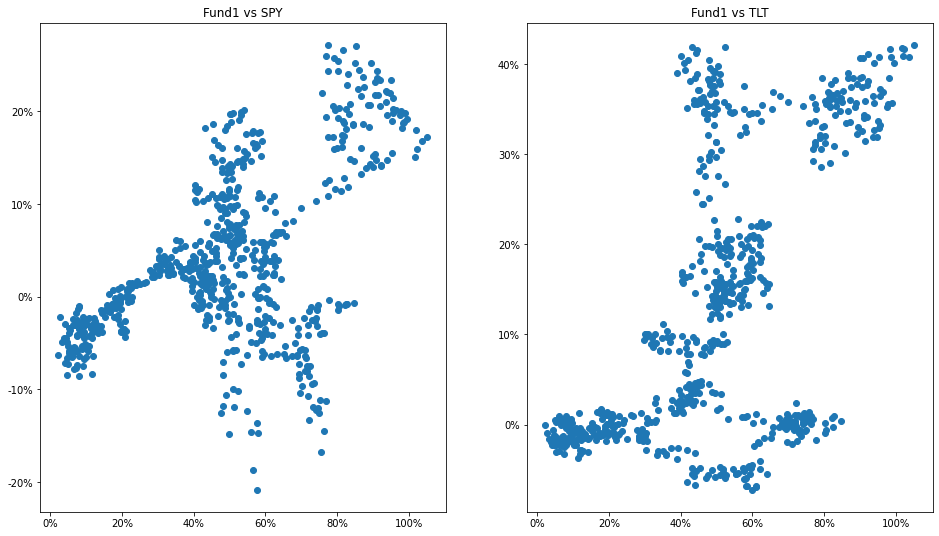

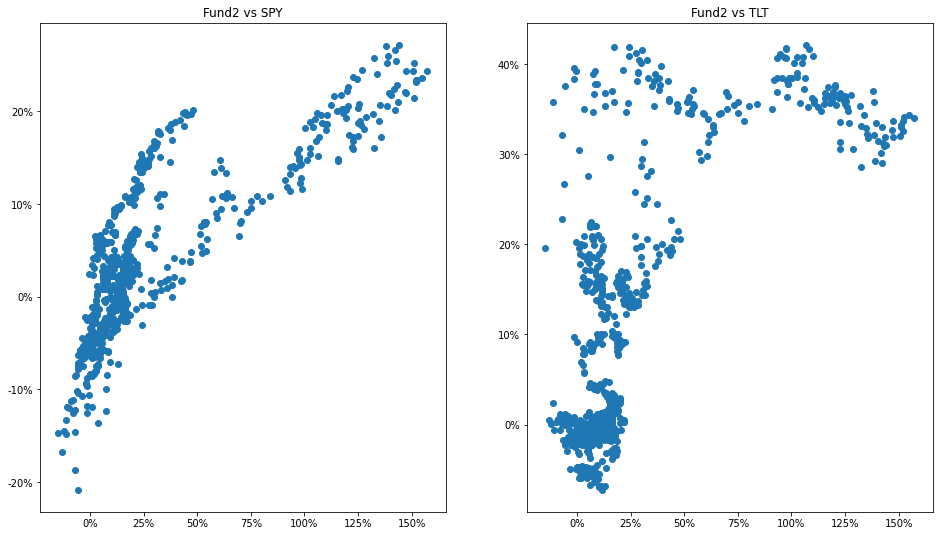

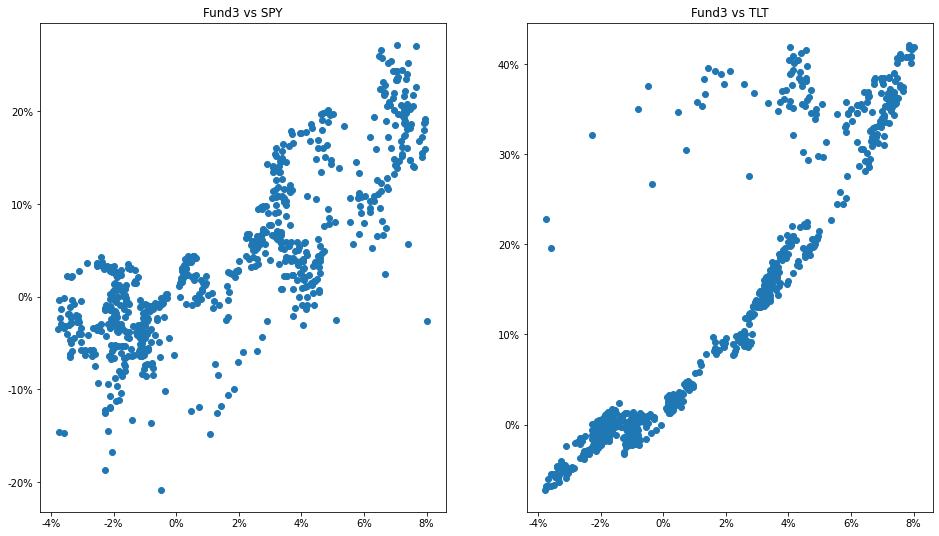

In [6]:
bm = ["SPY","TLT"]
for i in ret_series_close.columns:
    if i not in bm:
        fig, ax = plt.subplots(1,2, figsize=(16,9))
        c = 0
        for j in bm:
            if i != j:
                ax[c].scatter(ret_series_close[i], ret_series_close[j])
                ax[c].set_title("{} vs {}".format(i, j))
                ax[c].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
                ax[c].xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
                c += 1
            else:
                continue

### 5. Annualised volatility
Calculate and compare the volitilities of the funds and the benchmarks.

In [7]:
#ANSWER
close_price = merged_df["Close"]

annualized_vol = np.sqrt(252*np.log(close_price/close_price.shift(1)).var())
annualized_vol

Symbols
Fund1    0.220972
Fund2    0.375085
Fund3    0.051973
SPY      0.237665
TLT      0.155163
dtype: float64

### 6. Risk adjusted return
Calculate and compare the risk adjusted returns for the funds and the benchmarks.  Assume that the risk-free rate is 1%.

In [8]:
#ANSWER
no_of_days = ret_series_adj.index[-1] - ret_series_adj.index[0] 
no_of_yrs = 1016/365
annualized_ret = (1 + ret_series_adj.tail(1))**(1/no_of_yrs) - 1
display(annualized_ret)

risk_adj_ret = (annualized_ret - 0.01)/annualized_vol.T
risk_adj_ret

Symbols,Fund1,Fund2,Fund3,SPY,TLT
Date,,,,,
2020-11-13,0.228514,0.395193,0.058151,0.110689,0.126262


Symbols,Fund1,Fund2,Fund3,SPY,TLT
Date,,,,,
2020-11-13,0.988877,1.026949,0.926452,0.42366,0.749288


### 7. Calculate the skew and kurtosis
Calculate and compare the skew and kurtosis of the funds and the benchmarks.

In [9]:
#ANSWER
daily_ret = merged_df["Close"].pct_change()
display(daily_ret.skew())
display(daily_ret.kurtosis())

Symbols
Fund1   -0.018496
Fund2   -0.777667
Fund3   -4.145723
SPY     -0.671510
TLT      0.384837
dtype: float64

Symbols
Fund1    -0.215521
Fund2     5.412808
Fund3    58.727330
SPY      12.429567
TLT      13.811996
dtype: float64

### 8. Chart distribution of daily returns
Chart and compare the histogram of daily returns for the funds and benchmarks using 60 bins.  
*Hint: use the percent change values, not the return series values*

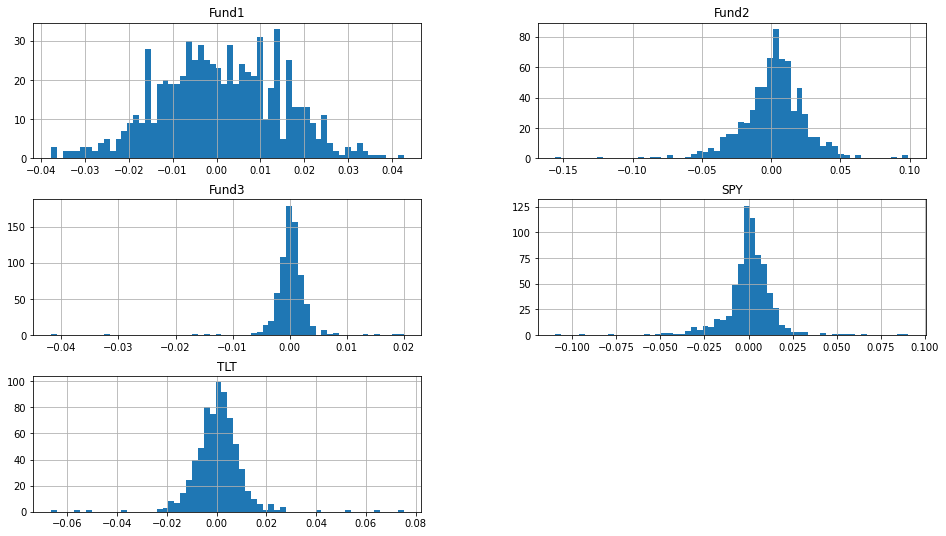

In [15]:
#ANSWER
daily_ret.hist(bins=60, figsize=(16,9))
plt.show()

-> Which fund do you think may be a fraud?  Fund #:1

Which data (e.g return series, volitility, correlation, ...)  make you think that?  Not all of the below may apply, just fill in only the ones that you think are relevant.


#ANSWER

Fund 1 is likely to be fraudulent

<BR>-> Data 1: Histogram(Daily return distribution)
<BR>-> Reason why: Fund 1 has the most out-of-the-place histogram compared to the distribution of other funds and benchmarks. The distribution appears to be binormal as it looks like it is artificially superimposed with two normal distribution. 

<BR>-> Data 2: Correlation with benchmarks
<BR>-> Reason why: Fund1's correlations with SPY and TLT are 0.52545 and 0.571534, which are significantly lower than those of other funds. This suggests that Fund 1 is artificially modelled and does not follow the benchmarks. 
    
<BR>-> Data 3: Skewness and kurtosis
<BR>-> Reason why: Fund 1's return skewnss and kurtosis are -0.018496 and -0.215521, which are the closest to 0 among other funds and benchmark, i.e. Fund 1's daily return distribution is the closest to a normal distribution. In real life, this is very unlikely as shown by the benchmark distributions. Hence, it is very likely that Fund 1's daily return is artificially modelled after a normal distribution(s) and thus fraudulent.
    

### Portfolio optimization

For the remaining two 'real' funds, what mix do you recommend to the investor. Suggest a mix of two values rounded to even 10 percent values, e.g. 90:10, 80:20, 70:30, ...

*Hint \#1: calculate the RAR of some different combinations and see which is highest.<BR>
*Hint \#2: make sure to use Adjusted Close prices for annualized return calculations.<BR>
*Hint \#3: make sure to use Close prices that are converted to a return series (in % terms) to calculate volitility for the merged data sets.*
<BR>-> Fund #:2
<BR>-> Percent allocation: 10%
<BR>-> Fund #:3
<BR>-> Percent allocation: 90%


In [18]:
# Answer

portfolio = {"Weight of Fund 2":[],
                 "Weight of Fund 3":[],
                 "Portfolio Return":[],
                "Portfolio Volatility":[],
                "Portfolio RAR":[]}

for i in np.arange(0.1,1,0.1):
    portfolio["Weight of Fund 2"].append(i)
    portfolio["Weight of Fund 3"].append(1-i)
    
    ret_series_adj_port = ret_series_adj["Fund2"]*i + ret_series_adj["Fund3"]*(1-i)
    ret_series_close_port = ret_series_close["Fund2"]*i + ret_series_close["Fund3"]*(1-i)
    
    annualized_ret_port = (1+ret_series_adj_port.tail(1)[-1])**(1/no_of_yrs) - 1
    portfolio["Portfolio Return"].append(annualized_ret_port)
    
    port_vol = np.sqrt(252) * np.log((ret_series_close_port + 1)/(ret_series_close_port + 1).shift(1)).std()
    portfolio["Portfolio Volatility"].append(port_vol)
    
    port_rar = (annualized_ret_port - 0.01)/port_vol
    portfolio["Portfolio RAR"].append(port_rar)

portfolio_df = pd.DataFrame(portfolio)
display(portfolio_df)
print("\nHighest RAR:")
display(portfolio_df.iloc[portfolio_df["Portfolio RAR"].idxmax()])


,Weight of Fund 2,Weight of Fund 3,Portfolio Return,Portfolio Volatility,Portfolio RAR
0,0.1,0.9,0.100673,0.070999,1.277097
1,0.2,0.8,0.140450,0.104563,1.247574
2,0.3,0.7,0.177896,0.140488,1.195093
3,0.4,0.6,0.213331,0.176194,1.154019
4,0.5,0.5,0.247011,0.211149,1.122478
5,0.6,0.4,0.279141,0.245289,1.097242
6,0.7,0.3,0.309894,0.278667,1.076170
7,0.8,0.2,0.339409,0.311367,1.057945
8,0.9,0.1,0.367808,0.343471,1.041741



Highest RAR:


Weight of Fund 2        0.100000
Weight of Fund 3        0.900000
Portfolio Return        0.100673
Portfolio Volatility    0.070999
Portfolio RAR           1.277097
Name: 0, dtype: float64

-> Explain why you think the fund with the heavier weighting improves the RAR more.

    Fund 3 has a heavier weighting of 90%. Having a heavier weight improves the RAR by reducing the portfolio volatility. Although Fund 3 has a lower annualized return of 0.058151 than Fund 2's 0.395193, it has also has a significantly lower annualized volatility of 0.051973 compared to Fund2's 0.375085
    
    Increasing weight of Fund 3 will reduce the overall volatility of the portfolio because the volatility of Fund 2 is much higher and should be adjusted down. 